In [1]:
import get_data, clean_data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import h5py

In [2]:
L = get_data.get_patients()
L[:10]

['A00055540',
 'A00054239',
 'A00063029',
 'A00062919',
 'A00053480',
 'A00056762',
 'A00054469',
 'A00062125',
 'A00053375',
 'A00055613']

At this point, you should set the environment variables AWS_ACCESS_KEY = 'your access key' and AWS_SECRET_KEY = 'your secret key'. You can do it automatically with:

~~~~
import os
os.environ['AWS_SECRET_KEY']='...'
os.environ['AWS_ACCESS_KEY']='...'
~~~~

In [3]:
filepath = get_data.get_record(L[0], recordnum = 1, recordtype = "full")

There is already a file named: tmp/A00055540_1.mat, returned that path instead of pulling data.


In [4]:
f = get_data.make_h5py_object(filepath)

In [5]:
f.keys()

[u'#refs#', u'result']

In [6]:
f['result'].keys()

[u'auto_badchans',
 u'chaninfo',
 u'chanlocs',
 u'comments',
 u'condition',
 u'data',
 u'dipfit',
 u'epoch',
 u'epochdescription',
 u'etc',
 u'event',
 u'eventdescription',
 u'filename',
 u'filepath',
 u'group',
 u'history',
 u'icaact',
 u'icachansind',
 u'icasphere',
 u'icasplinefile',
 u'icaweights',
 u'icawinv',
 u'nbchan',
 u'pnts',
 u'ref',
 u'reject',
 u'saved',
 u'session',
 u'setname',
 u'specdata',
 u'specicaact',
 u'splinefile',
 u'srate',
 u'stats',
 u'subject',
 u'times',
 u'trials',
 u'urchanlocs',
 u'urevent',
 u'xmax',
 u'xmin']

In [7]:
eeg_data = clean_data.get_eeg_data(f)

In [8]:
eeg_data.shape

(176000, 111)

In [9]:
c_coords = clean_data.get_electrode_coords(f, coords='euclidian')

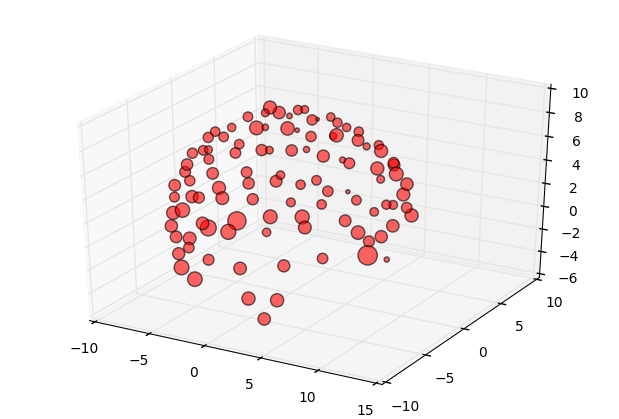

In [10]:
times = f['result']['times']
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
x, y, z = zip(*c_coords)
fig = plt.figure()
ax = Axes3D(fig)
def init():
    cols = ["blue" if eeg_data[1, k] > 0 else "red" for k in range(111)]
    d = [np.abs(eeg_data[1, k]) for k in range(111)]
    ax.scatter(x, y, z, s=d * 10, c=cols, alpha=0.6, depthshade = True)
def anim(i):
    ax.cla()
    cols = ["blue" if eeg_data[1, k] > 0 else "red" for k in range(111)]
    d = [np.abs(eeg_data[i, k]) for k in range(111)]
    ax.scatter(x, y, z, s=np.power(d, 1.4), c=cols, depthshade = True)
    ax.text(8, 8, 8, str(round(times[i], 4)), color="red")
anim = animation.FuncAnimation(fig, anim, init_func=init,
                               frames=200, interval=1, blit=False)

In [11]:
### THIS WILL TAKE A WHILE (like 2 minutes of killing your computer)
#anim.save('movie.gif')

/usr/local/lib/python2.7/dist-packages/matplotlib/animation.py:784: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


In [12]:
import random
I = random.sample(range(111), 10)

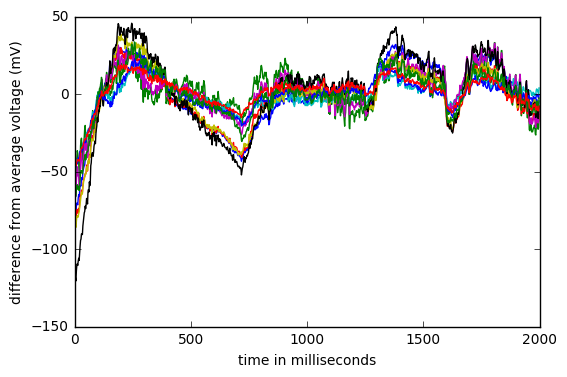

In [14]:
times = f['result']['times'][:1000]
plt.cla()
for i in I:
    data = eeg_data[:1000, i]
    plt.plot(times, data)
plt.xlabel("time in milliseconds")
plt.ylabel("difference from average voltage (mV)")
plt.show()

#are the y-axis units in millivolts?
#why are values positive? shouldnt they be negative?

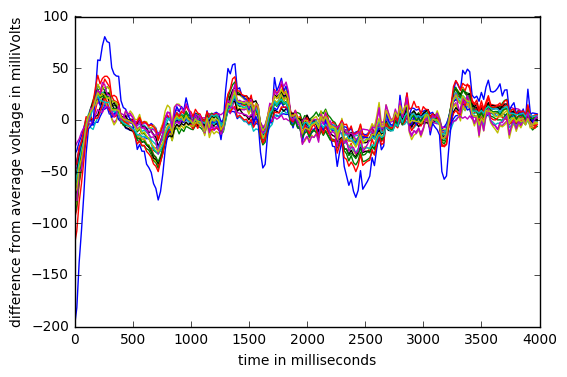

In [15]:
plt.cla()
import random
I = random.sample(range(111), 20)
lower = 0
upper = 2000
skip = 10
times = f['result']['times'][lower:upper:skip]
for i in I:
    data = eeg_data[lower:upper:skip, i]
    plt.plot(times, data)
plt.xlabel("time in milliseconds")
plt.ylabel("difference from average voltage in milliVolts")
plt.show()

In [16]:
# 5 of the channels are 'broken'
c = 0
broken = []
for i in range(111):
    if sum(eeg_data[:, i]**2) == 0:
        c = c + 1
        broken.append(i)
print c, broken

5 [0, 7, 19, 23, 30]


In [17]:
import plots


ValueError: x and y must have same first dimension

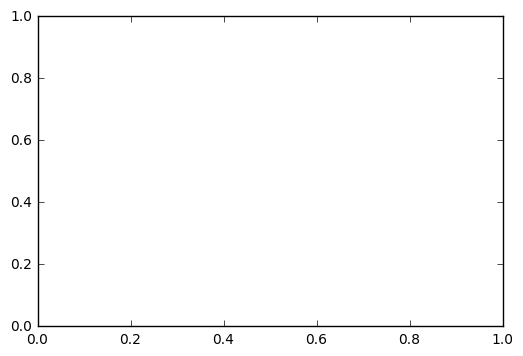

In [18]:
plots.plot_timeseries(eeg_data, times,
                      "random", 0, 200, 20, 10,
                     r'$t$ in milliseconds',
                     r'difference from mean in $mV$')